In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import itertools
import re
# from ggplot import *
from scipy import stats
from scipy.stats import pearsonr

from sklearn import datasets
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import copy

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [2]:
# data_vals = my_data.values.flatten()

# num_iterations=2
# print(data_vals.shape)

# print(fake_data.shape)

# mask_vals = get_flat_tril( my_mask )
# mask_vals.sum()
# np.random.choice(data_vals.flatten(), (num_iterations, mask_vals.sum()), replace=True)

#drew testing code to select lower diagonal data and flatten it
# lower_tri_values = np.tri(10,k=-1)
# print(lower_tri_values.shape)
# print(type(lower_tri_values))
# print(lower_tri_values.flatten().shape)

In [3]:
#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------
##Load csv file
##Freshest final latest last newest load loads


df_con = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_con_z.csv', index_col=0, header=0)
df_nm = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_nr_z.csv', index_col=0, header=0)
df_diff = df_nm - df_con
df_diff.to_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv')



#add matrix with inclusion info
brain_brain_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_brain-brain.csv', index_col=0, header=0)
endo_brain_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_endo-brain.csv', index_col=0, header=0)
beh_beh_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-beh.csv', index_col=0, header=0)
beh_endo_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-endo.csv', index_col=0, header=0)
beh_brain_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-brain.csv', index_col=0, header=0)




In [4]:
#Drew showing the effect of axis=0 or axis=1
# x = np.arange(1,51).reshape(10,5)

# y = np.arange(0,50).reshape(10,5)

# print(x.shape)
# print( x.mean().shape )
# print( x.mean(axis=0).shape )
# print( x.mean(axis=1).shape )

# print(x.mean(axis=1), y.mean(axis=1))
# print(x.mean(axis=1)-y.mean(axis=1))

In [5]:
#Three functions that process the data as such:
#An array with ones below the given diagonal (and not the diagonal: see k=-1) and zeros everywhere else
#Flatten it by turning the matrix into a row of values
def get_flat_tril( df ):
    vals = df.values
    lower_tri_values = np.tri(vals.shape[0],k=-1)
#     plt.figure()
#     plt.imshow(vals)
#     plt.figure()
#     plt.imshow(lower_tri_values)
    return vals[lower_tri_values==1].flatten()

#Grab values of dataframe only where vals =1 by running the function that makes a flat tril of the size that your matrix is in 
#Do this for both the csv with modality data mask and for all data
#produce fake data from lower diagonal of data vals, grab number of items needed for this mask size
def get_masked_data( df_to_mask, df_mask, num_fake_iterations=100 ):
    mask_vals = get_flat_tril( df_mask )
    data_vals = get_flat_tril( df_to_mask )
    
    masked_data = data_vals[ mask_vals == 1 ] 
    
    print(data_vals.shape, mask_vals.shape, masked_data.shape, mask_vals.sum())
    fake_data = np.random.choice(data_vals, (num_fake_iterations, mask_vals.sum()), replace=True)

    return( masked_data, fake_data)

#Run function to get masked data and get fake data, run this for two modality comparisons
#calculate difference between modalities for real data, and array of fake data 
#calcualte p value
def compute_category_diff_permutation( my_data, category_mask_one, category_mask_two, num_iterations=100):
    data, fake_data = get_masked_data(my_data, category_mask_one, num_fake_iterations=1000)
    data_category_two, fake_data_category_two = get_masked_data(my_data, category_mask_two, num_fake_iterations=1000)

    print(data.shape, fake_data.shape)

    # this is where you would compare two categories, i.e. two different masks. 
    actual_category_diff = data.mean() - data_category_two.mean()
    fake_category_diffs = fake_data.mean(axis=1) - fake_data_category_two.mean(axis=1)

    times_actual_greater_than_fake = np.sum(abs(fake_category_diffs) > abs(actual_category_diff))
    total_nuber_of_fakes = len(fake_category_diffs)
    p = times_actual_greater_than_fake / total_nuber_of_fakes
    print( "percent times actual diff > fake diff (p-val): ", p) 

    plt.figure()
    print(fake_data.mean(axis=1).shape)
    plt.hist(fake_category_diffs)
    plt.axvline(x=actual_category_diff, ymin=0, ymax=1, color='r')
    # plt.xlabel("Group")
    # plt.ylabel("Pair")
    # plt.savefig('../FIGS/NOMOM_scatter_Alone_Oxy_TillYear1.pdf', dpi=300, bbox_inches='tight', transparent=True)

    return p



(820,) (820,) (66,) 66
(820,) (820,) (12,) 12
(66,) (1000, 66)
percent times actual diff > fake diff (p-val):  0.015
(1000,)
p =  0.015


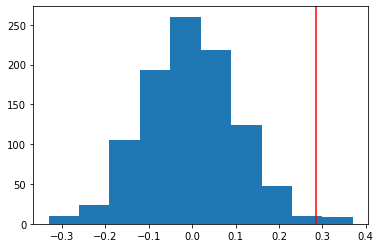

In [32]:
#Select data
##Freshest final latest last newest load loads
my_data = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv', index_col=0, header=0)

my_mask = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-beh.csv', index_col=0, header=0)
my_mask_category_two = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-endo.csv', index_col=0, header=0)

p = compute_category_diff_permutation( my_data, my_mask, my_mask_category_two, num_iterations=10000000)

print("p = ", p)
#print(x)

(820,) (820,) (66,) 66
(820,) (820,) (336,) 336
(66,) (1000, 66)
percent times actual diff > fake diff (p-val):  0.166
(1000,)
p =  0.166


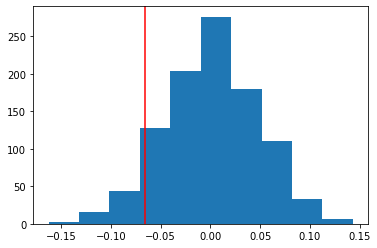

In [33]:
#Select data
##Freshest final latest last newest load loads
my_data = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv', index_col=0, header=0)

my_mask = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-beh.csv', index_col=0, header=0)
my_mask_category_two = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-brain.csv', index_col=0, header=0)

p = compute_category_diff_permutation( my_data, my_mask, my_mask_category_two, num_iterations=10000000)

print("p = ", p)
# print(x)

(820,) (820,) (66,) 66
(820,) (820,) (28,) 28
(66,) (1000, 66)
percent times actual diff > fake diff (p-val):  0.332
(1000,)
p =  0.332


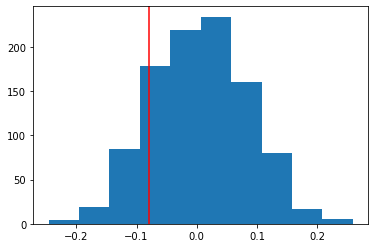

In [34]:
#Select data
##Freshest final latest last newest load loads
my_data = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv', index_col=0, header=0)

my_mask = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-beh.csv', index_col=0, header=0)
my_mask_category_two = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_endo-brain.csv', index_col=0, header=0)

p = compute_category_diff_permutation( my_data, my_mask, my_mask_category_two, num_iterations=10000000)

print("p = ", p)
# print(x)

(820,) (820,) (66,) 66
(820,) (820,) (378,) 378
(66,) (1000, 66)
percent times actual diff > fake diff (p-val):  0.0
(1000,)
p =  0.0


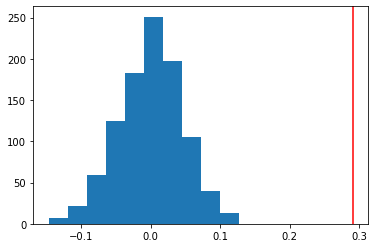

In [35]:
#Select data
##Freshest final latest last newest load loads
my_data = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv', index_col=0, header=0)

my_mask = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-beh.csv', index_col=0, header=0)
my_mask_category_two = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_brain-brain.csv', index_col=0, header=0)

p = compute_category_diff_permutation( my_data, my_mask, my_mask_category_two, num_iterations=10000000)

print("p = ", p)
# print(x)

(820,) (820,) (12,) 12
(820,) (820,) (336,) 336
(12,) (1000, 12)
percent times actual diff > fake diff (p-val):  0.002
(1000,)
p =  0.002


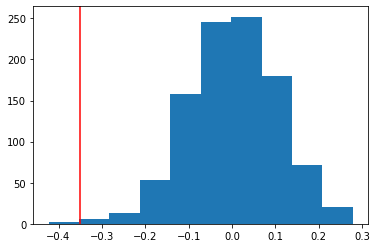

In [36]:
#Select data
##Freshest final latest last newest load loads
my_data = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv', index_col=0, header=0)

my_mask = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-endo.csv', index_col=0, header=0)
my_mask_category_two = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-brain.csv', index_col=0, header=0)

p = compute_category_diff_permutation( my_data, my_mask, my_mask_category_two, num_iterations=10000000)

print("p = ", p)
# print(x)

(820,) (820,) (12,) 12
(820,) (820,) (28,) 28
(12,) (1000, 12)
percent times actual diff > fake diff (p-val):  0.004
(1000,)
p =  0.004


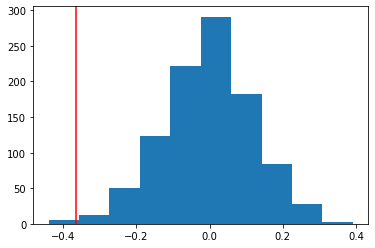

In [37]:
#Select data
##Freshest final latest last newest load loads
my_data = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv', index_col=0, header=0)

my_mask = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-endo.csv', index_col=0, header=0)
my_mask_category_two = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_endo-brain.csv', index_col=0, header=0)

p = compute_category_diff_permutation( my_data, my_mask, my_mask_category_two, num_iterations=10000000)

print("p = ", p)
# print(x)

(820,) (820,) (12,) 12
(820,) (820,) (378,) 378
(12,) (1000, 12)
percent times actual diff > fake diff (p-val):  0.947
(1000,)
p =  0.947


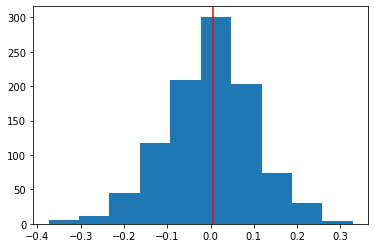

In [38]:
#Select data
##Freshest final latest last newest load loads
my_data = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv', index_col=0, header=0)

my_mask = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-endo.csv', index_col=0, header=0)
my_mask_category_two = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_brain-brain.csv', index_col=0, header=0)

p = compute_category_diff_permutation( my_data, my_mask, my_mask_category_two, num_iterations=10000000)

print("p = ", p)
# print(x)

(820,) (820,) (336,) 336
(820,) (820,) (28,) 28
(336,) (1000, 336)
percent times actual diff > fake diff (p-val):  0.843
(1000,)
p =  0.843


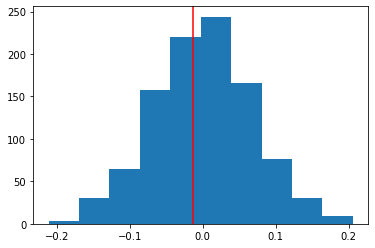

In [39]:
#Select data
##Freshest final latest last newest load loads
my_data = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv', index_col=0, header=0)

my_mask = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-brain.csv', index_col=0, header=0)
my_mask_category_two = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_endo-brain.csv', index_col=0, header=0)

p = compute_category_diff_permutation( my_data, my_mask, my_mask_category_two, num_iterations=10000000)

print("p = ", p)
# print(x)

(820,) (820,) (336,) 336
(820,) (820,) (378,) 378
(336,) (1000, 336)
percent times actual diff > fake diff (p-val):  0.0
(1000,)
p =  0.0


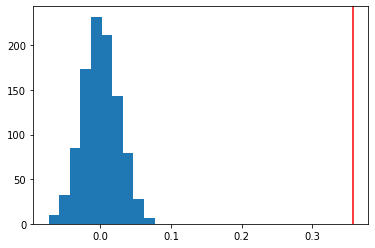

In [40]:
#Select data
##Freshest final latest last newest load loads
my_data = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv', index_col=0, header=0)

my_mask = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-brain.csv', index_col=0, header=0)
my_mask_category_two = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_brain-brain.csv', index_col=0, header=0)

p = compute_category_diff_permutation( my_data, my_mask, my_mask_category_two, num_iterations=10000000)

print("p = ", p)
# print(x)

(820,) (820,) (28,) 28
(820,) (820,) (378,) 378
(28,) (1000, 28)
percent times actual diff > fake diff (p-val):  0.0
(1000,)
p =  0.0


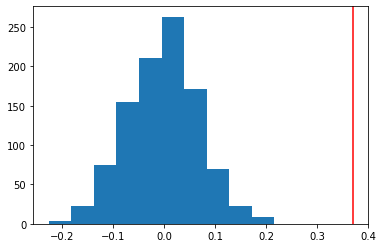

In [41]:
#Select data
##Freshest final latest last newest load loads
my_data = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv', index_col=0, header=0)

my_mask = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_endo-brain.csv', index_col=0, header=0)
my_mask_category_two = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_brain-brain.csv', index_col=0, header=0)

p = compute_category_diff_permutation( my_data, my_mask, my_mask_category_two, num_iterations=10000000)

print("p = ", p)
# print(x)

In [305]:
#---------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------
##Load csv file


# nomom = pd.read_csv('NOMOM_ALL_data_python.csv', index_col=0, na_values=['NA'])

# Con=nomom.loc[(nomom['Group'] == "Con")]
# Con.name = 'Con'
# NR=nomom.loc[(nomom['Group'] == "NR")]
# NR.name = 'NR'

z_score_corr_c = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_con_z.csv', index_col=0, header=0)
z_score_corr_nr = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_nr_z.csv', index_col=0, header=0)

#add matrix with inclusion info
endo_endo_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_endo-endo.csv', index_col=0, header=0)
brain_brain_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_brain-brain.csv', index_col=0, header=0)
endo_brain_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_endo-brain.csv', index_col=0, header=0)
beh_beh_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-beh.csv', index_col=0, header=0)
beh_endo_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-endo.csv', index_col=0, header=0)
beh_brain_matrix = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_matrix_beh-brain.csv', index_col=0, header=0)

#Manual file
# z_score_diff = pd.read_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff_manual_diag.csv', index_col=0, header=0)
#non manual file
z_score_diff = z_score_corr_nr - z_score_corr_c
# z_score_diff.to_csv('/Users/DOT/~Kalin-Lab~/ConteCenter/NOMOM/STATS/NOMOM_corr_matrix_diff.csv')

In [310]:
    beh_cols = list(np.arange(0,12,1))
    endo_cols = [12]
    brain_cols = list(np.arange(13,41,1))


# print(z_score_diff.iloc[np.array(beh_endo_matrix) > 0 ].iloc[beh_cols,beh_cols].mean())
# print(z_score_diff.iloc[np.array(endo_brain_matrix) > 0 ].iloc[endo_cols,brain_cols].mean())
# print(z_score_diff.iloc[beh_cols,beh_cols])

# print(z_score_diff.iloc[np.array(endo_brain_matrix) == 1 ])
print(z_score_diff.iloc[np.array(endo_brain_matrix) == 1 ].iloc[endo_cols])
 
# category_values['beh-beh'] =  z_score_diff.iloc[beh_cols,beh_cols].mean().mean()
# print(z_score_diff.iloc[np.array(endo_brain_matrix) > 0 ].mean().mean())

IndexError: positional indexers are out-of-bounds

In [295]:
for i, col in enumerate(z_score_diff.columns):
    print(i,col)

0 Environmental Explore (NEC-PET)
1 Environmental Explore (Alone-HIP)
2 Environmental Explore (Stare-HIP)
3 Experimenter Orient (NEC-PET)
4 Experimenter Orient (NEC-HIP)
5 Freezing (NEC-PET)
6 Freezing (Alone-HIP)
7 Locomotion (Alone-HIP)
8 Self-directed (NEC-PET)
9 Self-directed (Alone-HIP)
10 Self-directed (NEC-HIP)
11 Self-directed (Stare-HIP)
12 CSF Oxytocin
13 Internal Capsule cluster (MD)
14 OFC cluster 1 (MD)
15 IC/Parietal cluster (MD)
16 Temporal/Insular cluster (MD)
17 Occipito/Parietal cluster (MD)
18 OFC cluster 2 (MD)
19 Corona Radiata/IC cluster (MD)
20 Visual Cortex cluster (MD)
21 Medial Temporal cluster (MD)
22 Entorhinal cortex cluster (MD)
23 Cerebellum cluster (MD)
24 Internal Capsule cluster (AD)
25 Temporal/Insular cluster 1 (AD)
26 Temporal/Insular cluster 2 (AD)
27 Occipito/Parietal cluster 1 (AD)
28 Occipito/Parietal cluster 2 (AD)
29 Visual Cortex cluster 1 (AD)
30 Cerebellum cluster (AD)
31 Visual Cortex cluster 2 (AD)
32 IC/Parietal/Brainstem cluster (RD)
33

In [192]:
#Define which columns/rows are which modality
#old approach, now using csv
beh_cols = list(np.arange(0,12,1))
endo_cols = [12]
brain_cols = list(np.arange(13,41,1))
# z_score_diff.iloc[beh_cols,brain_cols]

In [193]:
# # Simplified version without matrix to indicate included values
# # function to compute differences
# def get_category_differences( z_score_diff ):
#     beh_cols = list(np.arange(0,12,1))
#     endo_cols = [12]
#     brain_cols = list(np.arange(13,41,1))
    
#     # might have to make a csv file to help select the right values from matrix without diagonal duplicates...
#     # beh_beh_matrix = np.array() # ones for beh_beh, zeros for else... 
#     # you might have to do something special to get rid of ones on the diagonal... 
#     #    z_score_diff.iloc[beh_beh_matrix > 0 ]

#     category_values = {}
#     category_values['beh-beh'] =  z_score_diff.iloc[beh_cols,beh_cols].mean().mean()
#     category_values['beh-endo'] = z_score_diff.iloc[beh_cols,endo_cols].mean().mean()
#     category_values['beh-brain'] = z_score_diff.iloc[beh_cols,brain_cols].mean().mean()
#     category_values['endo-brain'] = z_score_diff.iloc[endo_cols,brain_cols].mean().mean()
#     category_values['endo-endo'] = z_score_diff.iloc[endo_cols,endo_cols].mean().mean()
#     category_values['brain-brain'] = z_score_diff.iloc[brain_cols,brain_cols].mean().mean()
#     category_differences = {}
#     #Add variable
#     category_differences = category_values['beh-beh']-category_values['beh-brain']
#     return category_differences


In [158]:
# function to compute differences
# Implement csv files
def get_category_differences( z_score_diff ):
    beh_cols = list(np.arange(0,12,1))
    endo_cols = [12]
    brain_cols = list(np.arange(13,41,1))
    
    # might have to make a csv file to help select the right values from matrix without diagonal duplicates...
    endo_endo_array = np.array(endo_endo_matrix) # ones for beh_beh, zeros for else... 
    brain_brain_array = np.array(brain_brain_matrix)
    endo_brain_array = np.array(endo_brain_matrix)
    beh_beh_array = np.array(beh_beh_matrix)
    beh_endo_array = np.array(beh_endo_matrix)
    beh_brain_array = np.array(beh_brain_matrix)
    # Drew: you might have to do something special to get rid of ones on the diagonal... Do:I just made them 0 (hope that is ok?)
#     z_score_diff.iloc[beh_beh_matrix > 0 ]

    category_values = {}
    category_values['beh-beh'] =  z_score_diff.iloc[beh_beh_array > 0 ].iloc[beh_cols,beh_cols].mean().mean()
    category_values['beh-endo'] = z_score_diff.iloc[beh_endo_array > 0 ].iloc[beh_cols,endo_cols].mean().mean()
    category_values['beh-brain'] = z_score_diff.iloc[beh_brain_array > 0 ].iloc[beh_cols,brain_cols].mean().mean()
    category_values['endo-brain'] = z_score_diff.iloc[endo_brain_array > 0 ].iloc[endo_cols,brain_cols].mean().mean()
#     category_values['endo-endo'] = z_score_diff.iloc[endo_endo_array > 0 ].mean().mean() #there is only 1 value
    category_values['brain-brain'] = z_score_diff.iloc[brain_brain_array > 0 ].iloc[brain_cols,brain_cols].mean().mean()
    category_differences = {}
    category_differences['beh-beh-beh_endo'] = category_values['beh-beh']-category_values['beh-endo']
    category_differences['beh-beh-beh-brain'] = category_values['beh-beh']-category_values['beh-brain']
    category_differences['beh-beh-endo-brain'] = category_values['beh-beh']-category_values['endo-brain']
    category_differences['beh-beh-brain-brain'] = category_values['beh-beh']-category_values['brain-brain']
    category_differences['beh-endo-beh-brain'] = category_values['beh-endo']-category_values['beh-brain']   
    category_differences['beh-endo-endo-brain'] = category_values['beh-endo']-category_values['endo-brain']  
    category_differences['beh-endo-brain-brain'] = category_values['beh-endo']-category_values['brain-brain']      
    category_differences['beh-brain-endo-brain'] = category_values['beh-brain']-category_values['endo-brain']  
    category_differences['beh-brain-brain-brain'] = category_values['beh-brain']-category_values['brain-brain']
    category_differences['endo-brain-brain-brain'] = category_values['endo-brain']-category_values['brain-brain']
    return category_differences



In [162]:
# compute actual differences
actual_differences = get_category_differences( z_score_diff )
print(actual_differences()


{'beh-beh-beh_endo': 0.09424674593404883, 'beh-beh-beh-brain': 0.24150656604473753, 'beh-beh-endo-brain': 0.24150656604473755, 'beh-beh-brain-brain': 0.23064771852270727, 'beh-endo-beh-brain': 0.1472598201106887, 'beh-endo-endo-brain': 0.14725982011068872, 'beh-endo-brain-brain': 0.13640097258865846, 'beh-brain-endo-brain': 2.7755575615628914e-17, 'beh-brain-brain-brain': -0.010858847522030243, 'endo-brain-brain-brain': -0.010858847522030271}


In [145]:
# # compute fake differences (i.e. the distribution of differences)
# fake_differences = []
# for i in np.arange(0,1000,1):
#     shuffled_z_score_diffs = z_score_diff.iloc[np.random.choice(41, 41, replace=False),np.random.choice(41, 41, replace=False)]
#     fake_differences.append(get_category_differences( shuffled_z_score_diffs ))



In [ ]:
# compute fake differences (i.e. the distribution of differences)
# run for each combination of modalities
    z_score_diff_incl = {}
    z_score_diff_incl['beh-beh'] =  z_score_diff.iloc[beh_beh_array > 0 ]
    z_score_diff_incl['beh-endo'] = z_score_diff.iloc[beh_endo_array > 0 ]
    z_score_diff_incl['beh-brain'] = z_score_diff.iloc[beh_brain_array > 0 ]
    z_score_diff_incl['endo-brain'] = z_score_diff.iloc[endo_brain_array > 0 ]
#     category_values['endo-endo'] = z_score_diff.iloc[endo_endo_array > 0 ] #there is only 1 value
    z_score_diff_incl['brain-brain'] = z_score_diff.iloc[brain_brain_array > 0 ]
    
# fake_differences = []
for i in np.arange(0,100,1):
    shuffled_z_score_diffs = z_score_diff_incl.iloc[np.random.choice(41, 41, replace=False),np.random.choice(41, 41, replace=False)]
    fake_differences.append(get_category_differences( shuffled_z_score_diffs ))




In [160]:
print(actual_differences)
print(fake_differences)

{'beh-beh-beh_endo': 0.09424674593404883, 'beh-beh-beh-brain': 0.24150656604473753, 'beh-beh-endo-brain': 0.24150656604473755, 'beh-beh-brain-brain': 0.23064771852270727, 'beh-endo-beh-brain': 0.1472598201106887, 'beh-endo-endo-brain': 0.14725982011068872, 'beh-endo-brain-brain': 0.13640097258865846, 'beh-brain-endo-brain': 2.7755575615628914e-17, 'beh-brain-brain-brain': -0.010858847522030243, 'endo-brain-brain-brain': -0.010858847522030271}
[0.18182771641469603, 0.034911384846808294, -0.02538599057612083, 0.019585998765874038, 0.03808067940975156, -0.016075566661307536, 0.06355056056780428, -0.06254807691843592, -0.05581655685663322, -0.04315448941168344, -0.043985771830099794, 0.018097665258953538, 0.008431116219118052, -0.027229019711083075, 0.0031016954197634616, 0.003365952857482861, 0.014493037266851212, -0.020745359922683542, -0.03959967773351619, 0.15052230170534958, -0.06004745361012903, -0.07302591759420016, 0.0362281040956342, 0.03096551385856695, 0.1325349414726182, -0.097

In [147]:
# compute the proportion of fake differences < the actual difference

print(np.sum([actual_differences<x for x in fake_differences])/len(fake_differences))

0.0


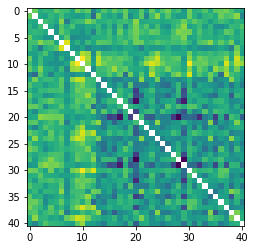

In [141]:
plt.imshow(z_score_diff)

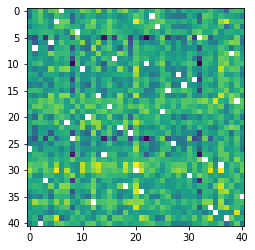

In [142]:
plt.imshow(shuffled_z_score_diffs)